`tf.data.Dataset` の使い方がわからなかったので試した。

- [TensorFlowで使えるデータセット機能が強かった話 - Qiita](https://qiita.com/Suguru_Toyohara/items/820b0dad955ecd91c7f3)

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2021-09-05 08:01:08.449526: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# list も OK
dataset = tf.data.Dataset.from_tensor_slices([0, 1, 2, 3, 4])
for item in dataset:
    print(item)


tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [5]:
# サイズの異なる list は NG
dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3]])
for item in dataset:
    print(item)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [6]:
# 複数のデータを Batch に流す
# (説明変数のデータと目的変数のデータを一緒に流せる)
dataset = tf.data.Dataset.from_tensor_slices((tf.range(10), tf.range(10, 20)))
for item1, item2 in dataset:
    print(item1, item2)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [7]:
# Python の zip のように複数の Input を流すことも可能
datasetX = tf.data.Dataset.from_tensor_slices(tf.range(-10, 0))
datasetY = tf.data.Dataset.from_tensor_slices((tf.range(10), tf.range(10, 20)))
dataset = tf.data.Dataset.zip((datasetX, datasetY))
for itemX, (itemY1, itemY2) in dataset:
    print(itemX, itemY1, itemY2)

tf.Tensor(-10, shape=(), dtype=int32) tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(-9, shape=(), dtype=int32) tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(-8, shape=(), dtype=int32) tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(-7, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(-6, shape=(), dtype=int32) tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(-5, shape=(), dtype=int32) tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(-4, shape=(), dtype=int32) tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(-3, shape=(), dtype=int32) tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(-2, shape=(), dtype=int32) tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor

In [8]:
# 要素ごとではなく Batch ごとに出力する
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).batch(5)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int32)


In [9]:
# データセットを繰り返す (repeat(repeat_num))
# repeat_num を指定しない場合は無限にリピートするので注意
dataset = tf.data.Dataset.from_tensor_slices(tf.range(3)).repeat(3)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [10]:
# Batch メソッドと併用も可能
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [11]:
# repeat と batch の順は逆でも OK (挙動は異なる)
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).batch(7).repeat(3)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9], shape=(3,), dtype=int32)


In [12]:
# shuffle(buffer_size)
# buffer_size の幅でシャッフルしていく
# shuffle(1) : シャッフルされない
# shuffle(2) : 隣同士が入れ替わるかどうかを端から端まで行う
# shuffle(3) : 3 要素をシャッフルするのを端から端まで行う

dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).shuffle(2)
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


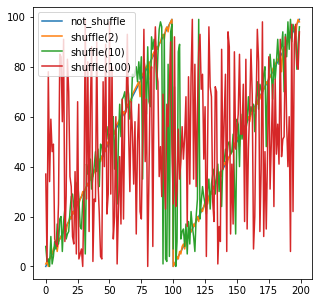

In [13]:
import matplotlib.pyplot as plt

datasetA = tf.data.Dataset.from_tensor_slices(tf.range(100)).repeat(2)
datasetB = tf.data.Dataset.from_tensor_slices(tf.range(100)).repeat(2).shuffle(2)
datasetC = tf.data.Dataset.from_tensor_slices(tf.range(100)).repeat(2).shuffle(10)
datasetD = tf.data.Dataset.from_tensor_slices(tf.range(100)).repeat(2).shuffle(100)
A = []
B = []
C = []
D = []
for (a, b, c, d) in zip(datasetA, datasetB, datasetC, datasetD):
    A.append(a.numpy())
    B.append(b.numpy())
    C.append(c.numpy())
    D.append(d.numpy())

plt.figure(figsize=(5, 5), facecolor="white")
plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.plot(D)
plt.legend(['not_shuffle', 'shuffle(2)', 'shuffle(10)', 'shuffle(100)'], loc='upper left')
plt.show()

In [14]:
# .repeat や .batch 同様、.shuffle もチェインメソッドで構成できる
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3).batch(7)
for item in dataset:
    print(item)
print("- "*30)
# .batch(n).shuffle(n) -> Batch をシャッフル
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3).batch(7).shuffle(5)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)


In [15]:
# 直感的な例
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).shuffle(10).batch(7)
for item in dataset:
    print(item)
print("- "*30)
# 非直感的な例
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).shuffle(10).batch(7).repeat(3)
for item in dataset:
    print(item)

tf.Tensor([6 2 9 1 0 8 7], shape=(7,), dtype=int32)
tf.Tensor([4 5 3], shape=(3,), dtype=int32)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
tf.Tensor([0 2 7 1 6 5 9], shape=(7,), dtype=int32)
tf.Tensor([4 3 8], shape=(3,), dtype=int32)
tf.Tensor([8 7 9 0 4 1 3], shape=(7,), dtype=int32)
tf.Tensor([2 5 6], shape=(3,), dtype=int32)
tf.Tensor([4 5 6 8 0 3 2], shape=(7,), dtype=int32)
tf.Tensor([1 7 9], shape=(3,), dtype=int32)


shuffle -> batch -> repeat と、塊ごとに処理している訳ではない。  
(塊ごとに処理しているなら、最初の2行が3回出力されるはず)  
チェインメソッドごとに一気に処理するのではなく、あくまでもパイプライン。

In [16]:
# 値を変える
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).map(lambda x: x**4)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)
tf.Tensor(256, shape=(), dtype=int32)
tf.Tensor(625, shape=(), dtype=int32)
tf.Tensor(1296, shape=(), dtype=int32)
tf.Tensor(2401, shape=(), dtype=int32)
tf.Tensor(4096, shape=(), dtype=int32)
tf.Tensor(6561, shape=(), dtype=int32)


2021-09-05 08:01:32.006622: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [17]:
# 分岐も可能
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).map(lambda x: (x, x**2))
for item1, item2 in dataset:
    print(item1, item2)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(81, shape=(), dtype=int32)


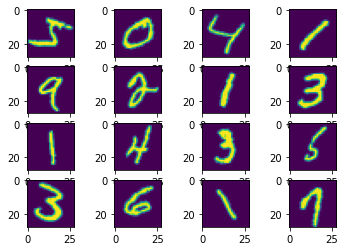

In [58]:
# 画像の Map
# 例: MNIST で回転の Data Augmentation
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

def rotate(image):
    return ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)

@tf.function
def rotate_tf(image):
    rotated = tf.py_function(rotate, [image], [tf.int32])
    return rotated[0]

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
# 疑問: 4次元に一旦形状を変える理由は？
# train_x = train_x.reshape(-1, 28, 28, 1)
train_ds = tf.data.Dataset.from_tensor_slices(train_x)
batched_train_ds = train_ds.map(rotate_tf).batch(16)

first_batch = next(iter(batched_train_ds))
# 疑問: 4次元 (16, 28, 28, 1) から 3次元に形状を調整？
# sample_images = first_batch.numpy().reshape((-1, 28, 28))
sample_images = first_batch.numpy()

plt.figure(facecolor="white")
for i, sample_image in enumerate(sample_images):
    plt.subplot(4, 4, i+1)
    plt.imshow(sample_image)
    plt.grid(False)
plt.show()

/var/folders/rl/kr4qkxgn0b37ktnfdb9_cbhh0000gn/T/ipykernel_39717/2532187398.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


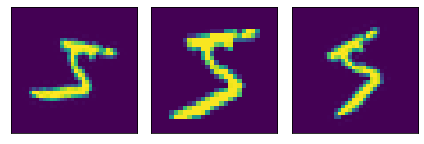

In [35]:
x = train_x[0]
fig = plt.figure()

# angle = -20
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(ndimage.rotate(x, -20))
ax1.set_xticks([])
ax1.set_yticks([])
# 未加工
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(x)
ax2.set_xticks([])
ax2.set_yticks([])
# angle = 20
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(ndimage.rotate(x, 20))
ax3.set_xticks([])
ax3.set_yticks([])

fig.tight_layout()
fig.show()

In [43]:
ndimage.rotate(x, -20, reshape=False).shape

# tf.py_function(rotate, [train_x], [tf.int32])

(28, 28, 1)